In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

[0.         1.00000006]


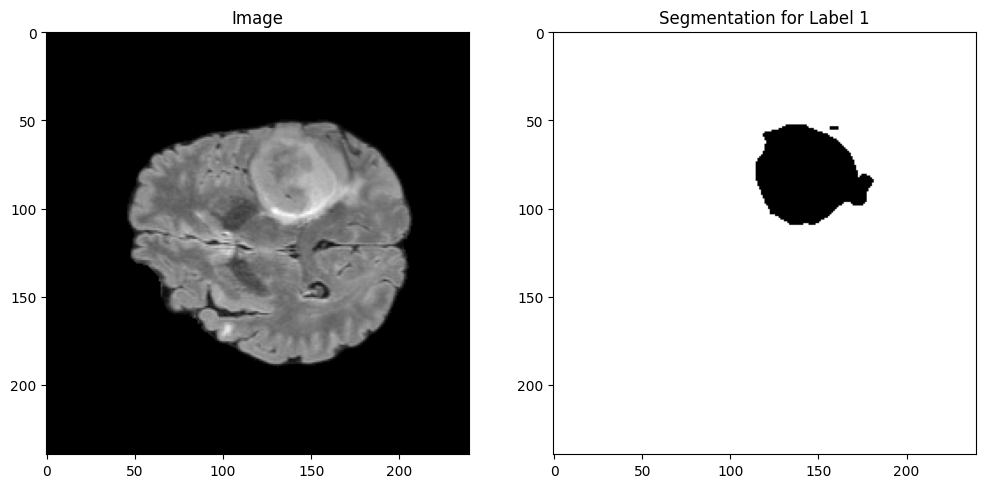

In [78]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Load the image
image = nib.load('/Users/Gabriel/MSc_Dissertation/pyRadiomics/Data/UCSF-PDGM-0369_nifti/UCSF-PDGM-0369_FLAIR_bias.nii.gz')
image_data = image.get_fdata()

# Load the segmentation
label = nib.load('/Users/Gabriel/MSc_Dissertation/pyRadiomics/Data/UCSF-PDGM-0369_nifti/UCSF-PDGM-0369_whole_tumor_segmentation.nii.gz')
label_data = label.get_fdata()
print(np.unique(label_data))

# Filter to only see one label / ROI
label_data_1 = np.where(label_data == 0, 1, 0) # Change the first of the 3 values to change which label you want to visualize (from 1 = core,4 = enhancing,2 = outer region)

# Define the slice you want to visualize (example: the middle slice)
slice_number = 84

# Display the image and the segmentation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_data[:, :, slice_number], cmap='gray')
plt.title('Image')

plt.subplot(1, 2, 2)
plt.imshow(label_data_1[:, :, slice_number], cmap='gray')
plt.title('Segmentation for Label 1')

plt.show()


### Next, visualize histogramm

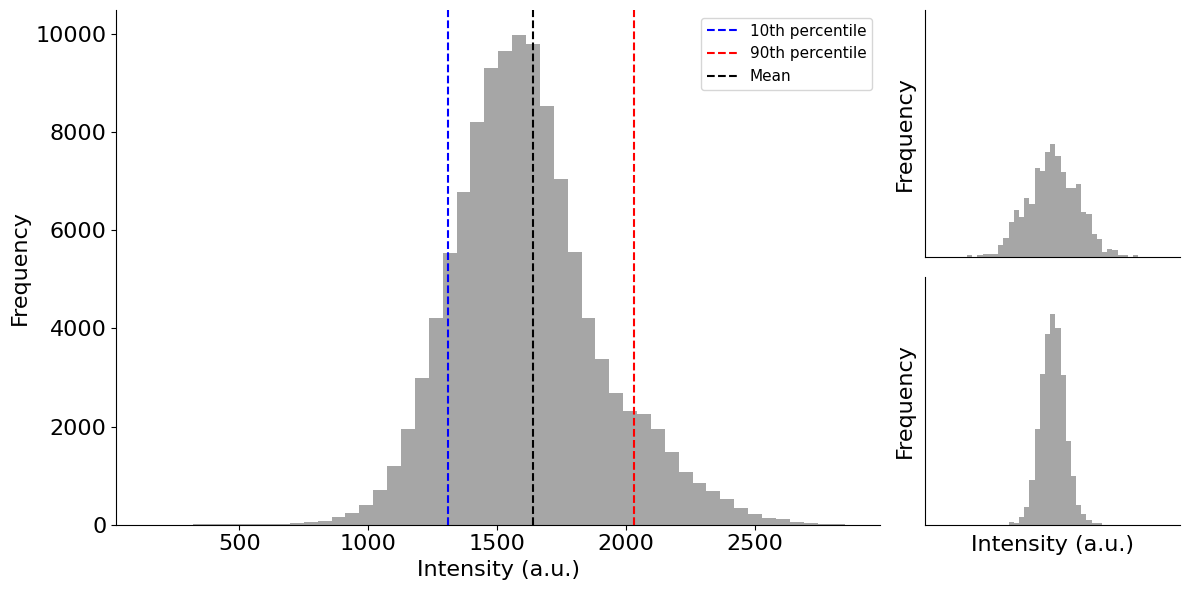

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# 1. Flatten the image data
image_data_flat = image_data.flatten()

# 2. Mask the image data with the label to get the intensities of the ROI
roi_intensities = image_data[label_data_1 == 0]

fontsize = 16

# Generate main histogram data (roi_intensities is your real data)
# Assuming roi_intensities is already defined in your code
hist, bin_edges = np.histogram(roi_intensities, bins=50)

# Calculate the 10th and 90th percentiles and the mean of the ROI intensities
p10 = np.percentile(roi_intensities, 10)
p90 = np.percentile(roi_intensities, 90)
mean_value = np.mean(roi_intensities)

# Generate random data for the side subplots
high_variance_data = np.random.normal(0, 2, 1000)
low_variance_data = np.random.normal(0, 1, 1000)

# Create the figure
fig = plt.figure(figsize=(12, 6))

# Set up the grid layout
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1])

# Main plot on the left
ax0 = plt.subplot(gs[:, 0])
ax0.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), color='grey', alpha=0.7)
ax0.axvline(p10, color='blue', linestyle='--', label='10th percentile')
ax0.axvline(p90, color='red', linestyle='--', label='90th percentile')
ax0.axvline(mean_value, color='black', linestyle='--', label='Mean')
ax0.set_xlabel('Intensity (a.u.)', fontsize=fontsize)
ax0.set_ylabel('Frequency', fontsize=fontsize)
ax0.tick_params(axis='both', which='major', labelsize=fontsize)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)

# High variance subplot
ax1 = plt.subplot(gs[0, 1])
ax1.hist(high_variance_data, bins=np.linspace(-10, 10, 50), color='grey', alpha=0.7)
ax1.set_xlim([-10, 10])
ax1.set_ylim([0, 200])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Frequency', fontsize=fontsize)
ax1.set_xticks([])
ax1.set_yticks([])

# Low variance subplot
ax2 = plt.subplot(gs[1, 1])
ax2.hist(low_variance_data, bins=np.linspace(-10, 10, 50), color='grey', alpha=0.7)
ax2.set_xlim([-10, 10])
ax2.set_ylim([0, 200])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylabel('Frequency', fontsize=fontsize)
ax2.set_xlabel('Intensity (a.u.)', fontsize=fontsize)
ax2.set_xticks([])
ax2.set_yticks([])


# Add legend and tighten layout
ax0.legend(fontsize=fontsize-5, loc='upper right')

# Show plot
plt.tight_layout()
plt.savefig('/Users/Gabriel/Desktop/Histogram_firstorder.png', dpi = 300)
plt.show()
